In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import solve_bvp, simps
from scipy.optimize import minimize

In [2]:
# Для начала определим значения наших нетрививальных параметров - я ДЕНисенко ДМИтрий СЕРгеевич:

a1 = 5
a2 = 6
a3 = 15

b1 = 5
b2 = 14
b3 = 10

c1 = 19
c2 = 6
c3 = 18


Результат оптимизации (Максимум):

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: -inf
        x: [-1.400e+01 -1.333e+149 ...  1.251e+150  1.000e+01]
      nit: 14
      jac: [-0.000e+00  2.504e+151 ... -2.352e+152  0.000e+00]
     nfev: 12532
     njev: 241
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>

Оптимизация не сошлась.


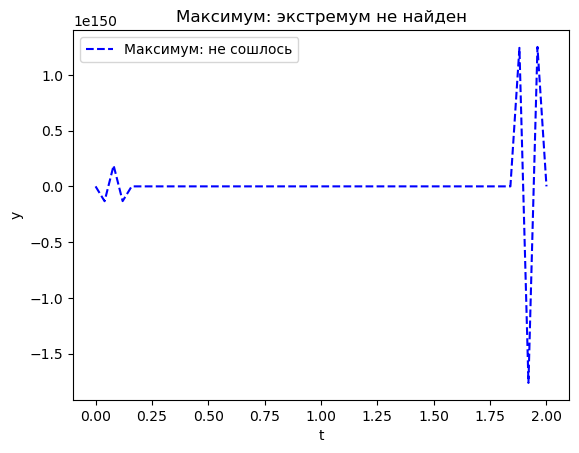


Результат оптимизации (Минимум):

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -735.559034196745
        x: [-1.400e+01 -1.337e+01 ...  4.959e+00  1.000e+01]
      nit: 78
      jac: [ 3.522e+01 -4.547e-04 ...  1.819e-04  3.727e+02]
     nfev: 4212
     njev: 81
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>

Значение функционала V[y]: -735.559034



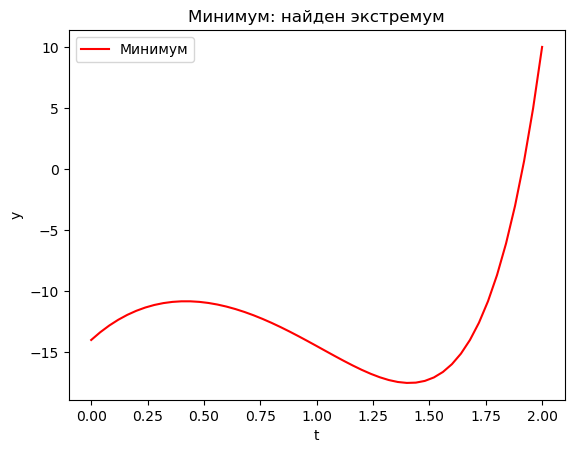

In [3]:
# Задание 1

# Обозначим точки разбиения для численного приближения (подбираются эмпирически, 51 вроде бы нормально):

num_of_fractions = 51

# Создадим массив значений времени t на отрезке [0, 2]:

t = np.linspace(0, 2, num_of_fractions)

# Определим шаг сетки времени:

dt = t[1] - t[0]

# Определим функционал V[y], с которым будем работать далее:

def V(y, sign=1):
    diff = (y[1:] - y[:-1]) / dt   # вычислим производную y по времени с помощью разностного метода
    
    # Вычислим подынтегральное выражение на основе дифференцированного y и других коэффициентов:
    
    integrand = (diff**2                       
                 + a1 * (y[1:] * diff)        
                 + b1 * (y[1:]**2)             
                 + c1 * (y[1:] * np.exp(2 * t[1:])))
    
    # В итоге вернем численное приближение интеграла как сумму подынтегрального выражения:
    
    return sign * np.sum(integrand * dt)  # sign определяет, ищем мы минимум (-1) или максимум (1)

# Зададим начальное приближение для функции y на сетке [0, 2]:

y0 = np.linspace(-b2, b3, num_of_fractions)

# Определим небольшой "допуск" для граничных условий:

EPS = 1e-8

# Зададим ограничения для оптимизации (значения на границах (y(0) = -b2 и y(2) = b3) фиксируются): 

bounds = [(None, None) for _ in range(num_of_fractions)]
bounds[0] = (-b2 - EPS, -b2 + EPS)  # граничное условие в точке t=0
bounds[-1] = (b3 - EPS, b3 + EPS)   # граничное условие в точке t=2

# Определим функцию для оптимизации и визуализации результата:

def optimize_and_plot(sign, title):
    # Оптимизимируем функционала V[y] с помощью метода L-BFGS-B
    # (через аппроксимацию алгоритма Бройдена-Флетчера-Гольдфарба-Шенно):
    
    result = minimize(V, y0, args=(sign,), method='L-BFGS-B', bounds=bounds)
    
    y_opt = result.x
    
    V_value = V(y_opt, sign=1)
    
    print(f"\nРезультат оптимизации ({title}):")
    print()
    print(result)
    
    # Проведем проверку успешности оптимизации (вдруг мы не найдем максимум или минимум):
    
    if result.success:
        print()
        print(f"Значение функционала V[y]: {V_value:.6f}")
        print()
    else:
        print()
        print("Оптимизация не сошлась.")
    
    # Визуализируем все:
    
    plt.figure()
    if result.success:
        plt.plot(t, y_opt, 'r', label=f'{title}') 
        plt.title(f'{title}: найден экстремум')   
    else:
        plt.plot(t, y_opt, 'b--', label=f'{title}: не сошлось') 
        plt.title(f'{title}: экстремум не найден')  
    plt.xlabel('t')  
    plt.ylabel('y')
    plt.legend()    
    plt.show()      

# Запустим процесс оптимизации:

optimize_and_plot(sign=-1, title='Максимум')

optimize_and_plot(sign=1, title='Минимум')